# Normalización

En ocasiones puede suceder que los datos que la red va a procesar no tienen el mismo orden de magnitud. Por ejemplo, algunos pueden estar en el orden de los miles, mientras que otros en el de las centesimas. Por esta razon, es recomendable que antes de presentar un conjunto de datos para el entrenamiento una RNA se realice algún tipo de procesamiento, con el fin de facilitarle el trabajo a la red y esta sea capaz de generalizar el comportamiento de datos.

In [3]:
import pandas as pd

data = pd.read_csv("datasets/cereal.csv")
data

,nombre,fabricante,tipo,calorias,proteinas,grasas,sodio,fibra,carbohidratos,azucares,potasio,vitaminas,caducidad,peso,tazas,valoracion
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,0.684030
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,0.339837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,0.594255
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,0.937049
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,0.343848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,0.391062
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,0.277533
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,0.497874
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,0.515922


In [4]:
data.describe()

,calorias,proteinas,grasas,sodio,fibra,carbohidratos,azucares,potasio,vitaminas,caducidad,peso,tazas,valoracion
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,0.426657
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,0.140473
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,0.180429
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,0.331741
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,0.404002
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,0.508284
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,0.937049


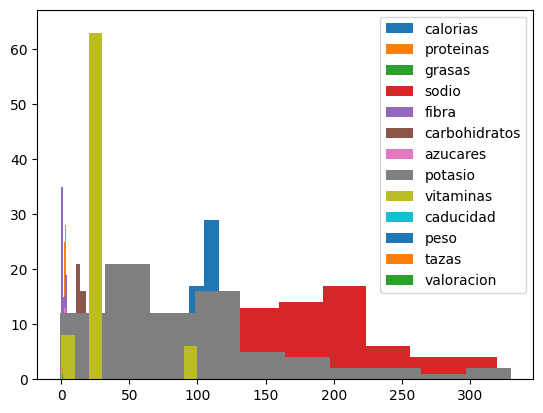

In [5]:
import matplotlib.pyplot as plt

for i in data.columns[3:]:
    plt.hist(data[i], label = [i])

plt.legend()

# Normalización

Una de las normalizaciones más aplicadas es aquella que traslada los datos a un intervalo de [0,1].

$$ norm = \frac{x - min}{max - min} $$

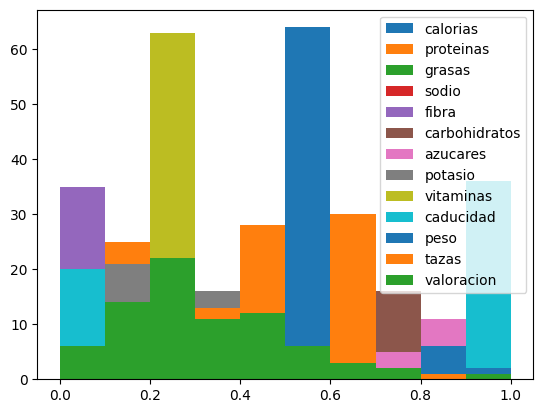

In [6]:
from sklearn.preprocessing import MinMaxScaler

# normalizer = MinMaxScaler(feature_range=(-1, 1))
normalizer = MinMaxScaler()
data_normalized = normalizer.fit_transform(data.iloc[:, 3:])

for i in range(data_normalized.shape[1]):
    plt.hist(data_normalized[:, i], label = [data.columns[3 + i]])

plt. legend()

In [7]:
pd.DataFrame(data_normalized, columns = data.columns[3:]).describe()

,calorias,proteinas,grasas,sodio,fibra,carbohidratos,azucares,potasio,vitaminas,caducidad,peso,tazas,valoracion
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.517119,0.309091,0.202597,0.498985,0.153711,0.649892,0.495130,0.293287,0.282468,0.603896,0.529610,0.456831,0.325432
std,0.177128,0.218958,0.201295,0.261976,0.170240,0.178290,0.277805,0.215368,0.223425,0.416262,0.150477,0.186173,0.185658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454545,0.200000,0.000000,0.406250,0.071429,0.541667,0.250000,0.123867,0.250000,0.000000,0.500000,0.336000,0.199985
50%,0.545455,0.400000,0.200000,0.562500,0.142857,0.625000,0.500000,0.274924,0.250000,0.500000,0.500000,0.400000,0.295490
75%,0.545455,0.400000,0.400000,0.656250,0.214286,0.750000,0.750000,0.365559,0.250000,1.000000,0.500000,0.600000,0.433315
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Normalizacion Z-score

Transforma los datos para que tengan media 0 y desviación estándar 1 (distribución normal estándar)

$$ norm = \frac{x - mean}{std} $$

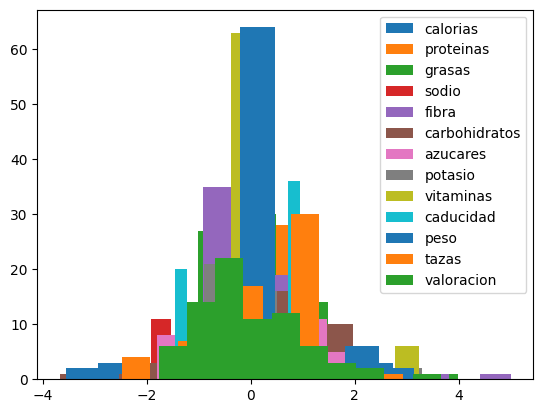

In [8]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
data_normalized = normalizer.fit_transform(data.iloc[:, 3:])

for i in range(data_normalized.shape[1]):
    plt.hist(data_normalized[:, i], label = [data.columns[3 + i]])

plt. legend()

In [9]:
pd.DataFrame(data_normalized, columns = data.columns[3:]).describe()

,calorias,proteinas,grasas,sodio,fibra,carbohidratos,azucares,potasio,vitaminas,caducidad,peso,tazas,valoracion
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-8.398765e-17,2.018587e-17,8.583502e-17,5.767392e-18,9.155735e-17,2.883696e-18,-1.658125e-17,-7.353425e-17,2.883696e-17,-1.095805e-16,-1.881612e-16,1.492313e-16,1.802310e-17
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-3.669045e+00,-1.793978e+00,-1.370723e+00,-1.272550e+00,-1.460273e+00,-3.542628e+00,-2.469891e+00,-1.764349e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-6.109983e-01,-8.881661e-01,-7.918105e-01,-1.462701e-01,-1.460273e+00,-1.980675e-01,-6.532825e-01,-6.801207e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-1.405296e-01,1.764569e-02,-8.581921e-02,-1.462701e-01,-2.512297e-01,-1.980675e-01,-3.072619e-01,-1.623340e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.651734e-01,9.234575e-01,3.377756e-01,-1.462701e-01,9.578133e-01,-1.980675e-01,7.740527e-01,5.848967e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,1.976579e+00,1.829269e+00,3.302939e+00,3.232570e+00,9.578133e-01,3.146493e+00,2.936682e+00,3.657211e+00


# Normalización por Escalado Robusto
Cambia la escala de los datos sin alterar su distribucion. El escalado robusto es menos sensible a outliers

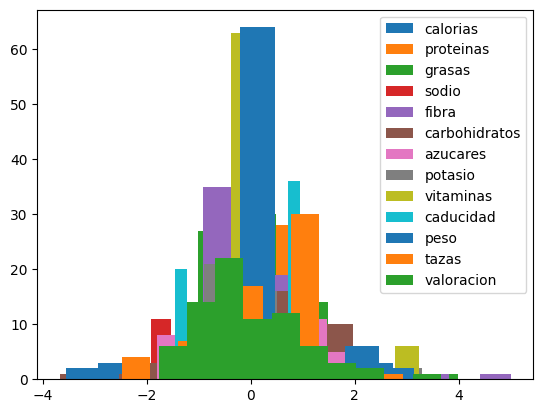

In [10]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
data_normalized = normalizer.fit_transform(data.iloc[:, 3:])

for i in range(data_normalized.shape[1]):
    plt.hist(data_normalized[:, i], label = [data.columns[3 + i]])

plt.legend()